# Linear Regression Tutorial
This notebook demonstrates various concepts in linear regression, including:

- Simple linear regression with one variable
- Multiple linear regression with several variables
- Handling non-linear features
- Feature transformations and engineering
- Model comparison and evaluation

## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Apply a style ggplot to the plots
from matplotlib import style
style.use('ggplot')

# fix the random seed to ensure that the results are reproducible
np.random.seed(42)

## PART 1: SIMPLE LINEAR REGRESSION (ONE VARIABLE)

First, we'll demonstrate simple linear regression with a single input variable.

In [3]:
#f(x) = y = w.x + b

### Create a synthetic Dataset

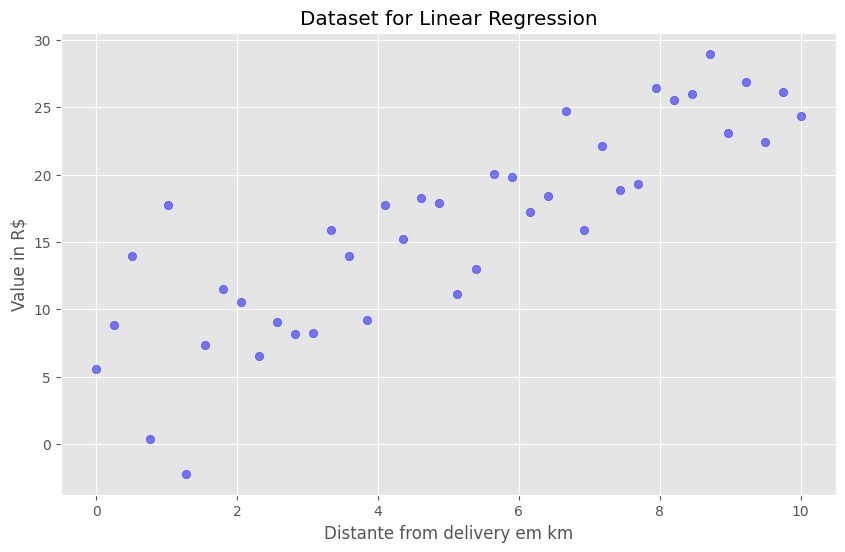

In [15]:
# Create a simple dataset for demonstration
n_samples = 40

# features
X = np.linspace(0, 10, n_samples).reshape(-1, 1) # reshape to make it a 2D array for sklearn change from (n_samples,) to (n_samples, 1)

# Target variable with some noise
# flatten() is used to convert the 2D array back to a 1D array for the linear equation
# if is only for view, we can use ravel() instead of flatten() to achieve the same result
y = 2 * X.flatten() + 5 + np.random.normal(0, 5, n_samples)  # y = 2x + 5 + gaussian noise

# Visualize the dataset
plt.figure(figsize=(10, 6)) # set the figure size to 10 inches wide and 6 inches tall
plt.scatter(X, y, color='blue', alpha=0.5) # create a scatter plot with X on the x-axis and y on the y-axis, with blue points and 50% transparency
plt.title('Dataset for Linear Regression')
plt.xlabel('Distante from delivery em km')
plt.ylabel('Value in R$')
plt.show()

### Fit model and obtain the parameters

In [16]:
# Create and train a simple linear regression model
model = LinearRegression() # create an instance of the LinearRegression class
model.fit(X, y) # fit the model to the data (X and y)

LinearRegression()

In [17]:
# Get the model parameters
w = model.coef_[0] # get the angular coefficient (slope/weight) of the linear model
b = model.intercept_ # get the linear coefficient (intercept/bias) of the linear model

print(f'Linear model parameters: w = {w:.2f}, b = {b:.2f}')

Linear model parameters: w = 2.15, b = 5.32


### Prediction

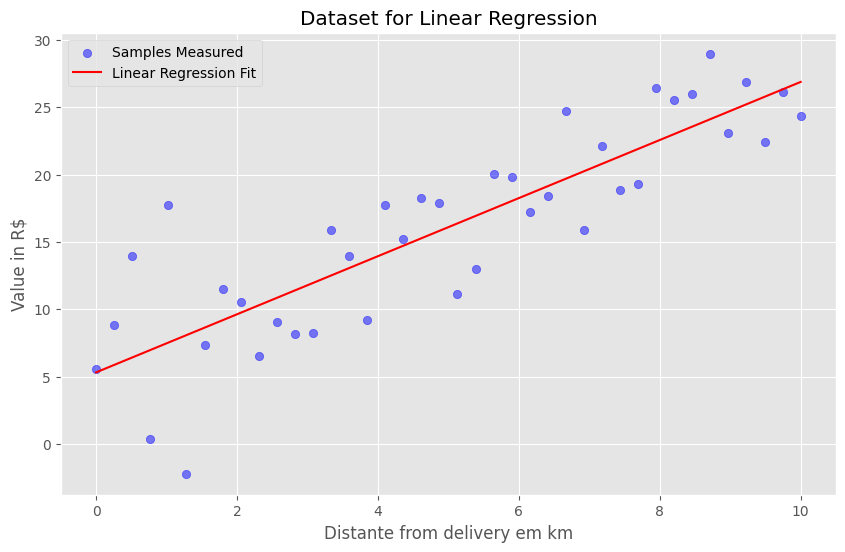


Simple Linear Regression Results:

Equation: y = 2.15x + 5.32
True Equation: y = 2x + 5 + noise

Mean Squared Error: 15.3818
Root Mean Squared Error: 3.9220
R-squared Score: 0.7256


In [ ]:
# Make predictions using the trained model
y_pred = model.predict(X) # predict the target variable using the trained model and the input features X

# Calculate the loss function (Mean Squared Error and R-squared)
mse = mean_squared_error(y, y_pred) # calculate the mean squared error between the true values (y) and the predicted values (y_pred)
r2 = r2_score(y, y_pred) # calculate the R-squared score between the true values (y) and the predicted values (y_pred)
rmse = np.sqrt(mse) # calculate the root mean squared error by taking the square root of the mean squared error

# plot the regression line along with the original data points
plt.figure(figsize=(10, 6)) # set the figure size to 10 inches wide and 6 inches tall
plt.scatter(X, y, color='blue', alpha=0.5, label='Samples Measured') # create a scatter plot with label it as 'Samples Measured'
plt.plot(X, y_pred, color='red', label='Linear Regression Fit') # plot the predicted values (y_pred) as a red line and label it as 'Linear Regression Fit'
plt.title('Dataset for Linear Regression')
plt.xlabel('Distante from delivery em km')
plt.ylabel('Value in R$')
plt.legend() # add a legend to the plot
plt.show()

print('\nSimple Linear Regression Results:')
print(f'\nEquation: y = {w:.2f}x + {b:.2f}')
print('True Equation: y = 2x + 5 + noise\n')
print(f'Mean Squared Error: {mse:.4f}') # similar to the variance of the residuals, but uses the predicted value instead of the mean. Error's variance.
print(f'Root Mean Squared Error: {rmse:.4f}') # value that represents the standard deviation of the errors (prediction errors)
print(f'R-squared Score: {r2:.4f}')